In [163]:
from __future__ import division
import os
import string
import cufflinks as cf
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import seaborn as sns
from scipy import stats, integrate
from scipy.stats import t
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(100,70)},font='sans-serif', font_scale=5,color_codes=True)
np.random.seed(sum(map(ord,"distributions")))

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
cf.set_config_file(offline=True,world_readable=True,theme='ggplot')
df = pd.read_csv('/Users/nickpourazima/GitHub/he-sm/Completed Tests/Combo/Combo_Final.csv')
users = ['394','390','399','486','591','510','729','932','521','514','379','824','506','552','367','410']
testList = ['A1a1','A1a2','A1a3','A1a4','A1b1','A1b2','A1b3','A1b4','A2a1','A2a2','A2a3','A2a4','A2b1','A2b2','A2b3','A2b4',
       'A3a1','A3a2','A3a3','A3a4','A3b1','A3b2','A3b3','A3b4','A4a1','A4a2','A4a3','A4a4','A4b1','A4b2','A4b3','A4b4',
       'H1a1','H1a2','H1a3','H1a4','H1b1','H1b2','H1b3','H1b4','H2a1','H2a2','H2a3','H2a4','H2b1','H2b2','H2b3','H2b4']
#            'P1H1a1','P2H1a2','P3H1b1','P4H1b2','P5H1b3','P6A1a2','P7A1b1','P8A2a1']
df = df[df.Test.isin(testList)]
df = df[df["User ID"].isin(users)]
# df.IOI = pd.to_timedelta((df.IOI),unit='ms')/np.timedelta64(1, 'ms')
# df.to_csv("Combo2.csv")

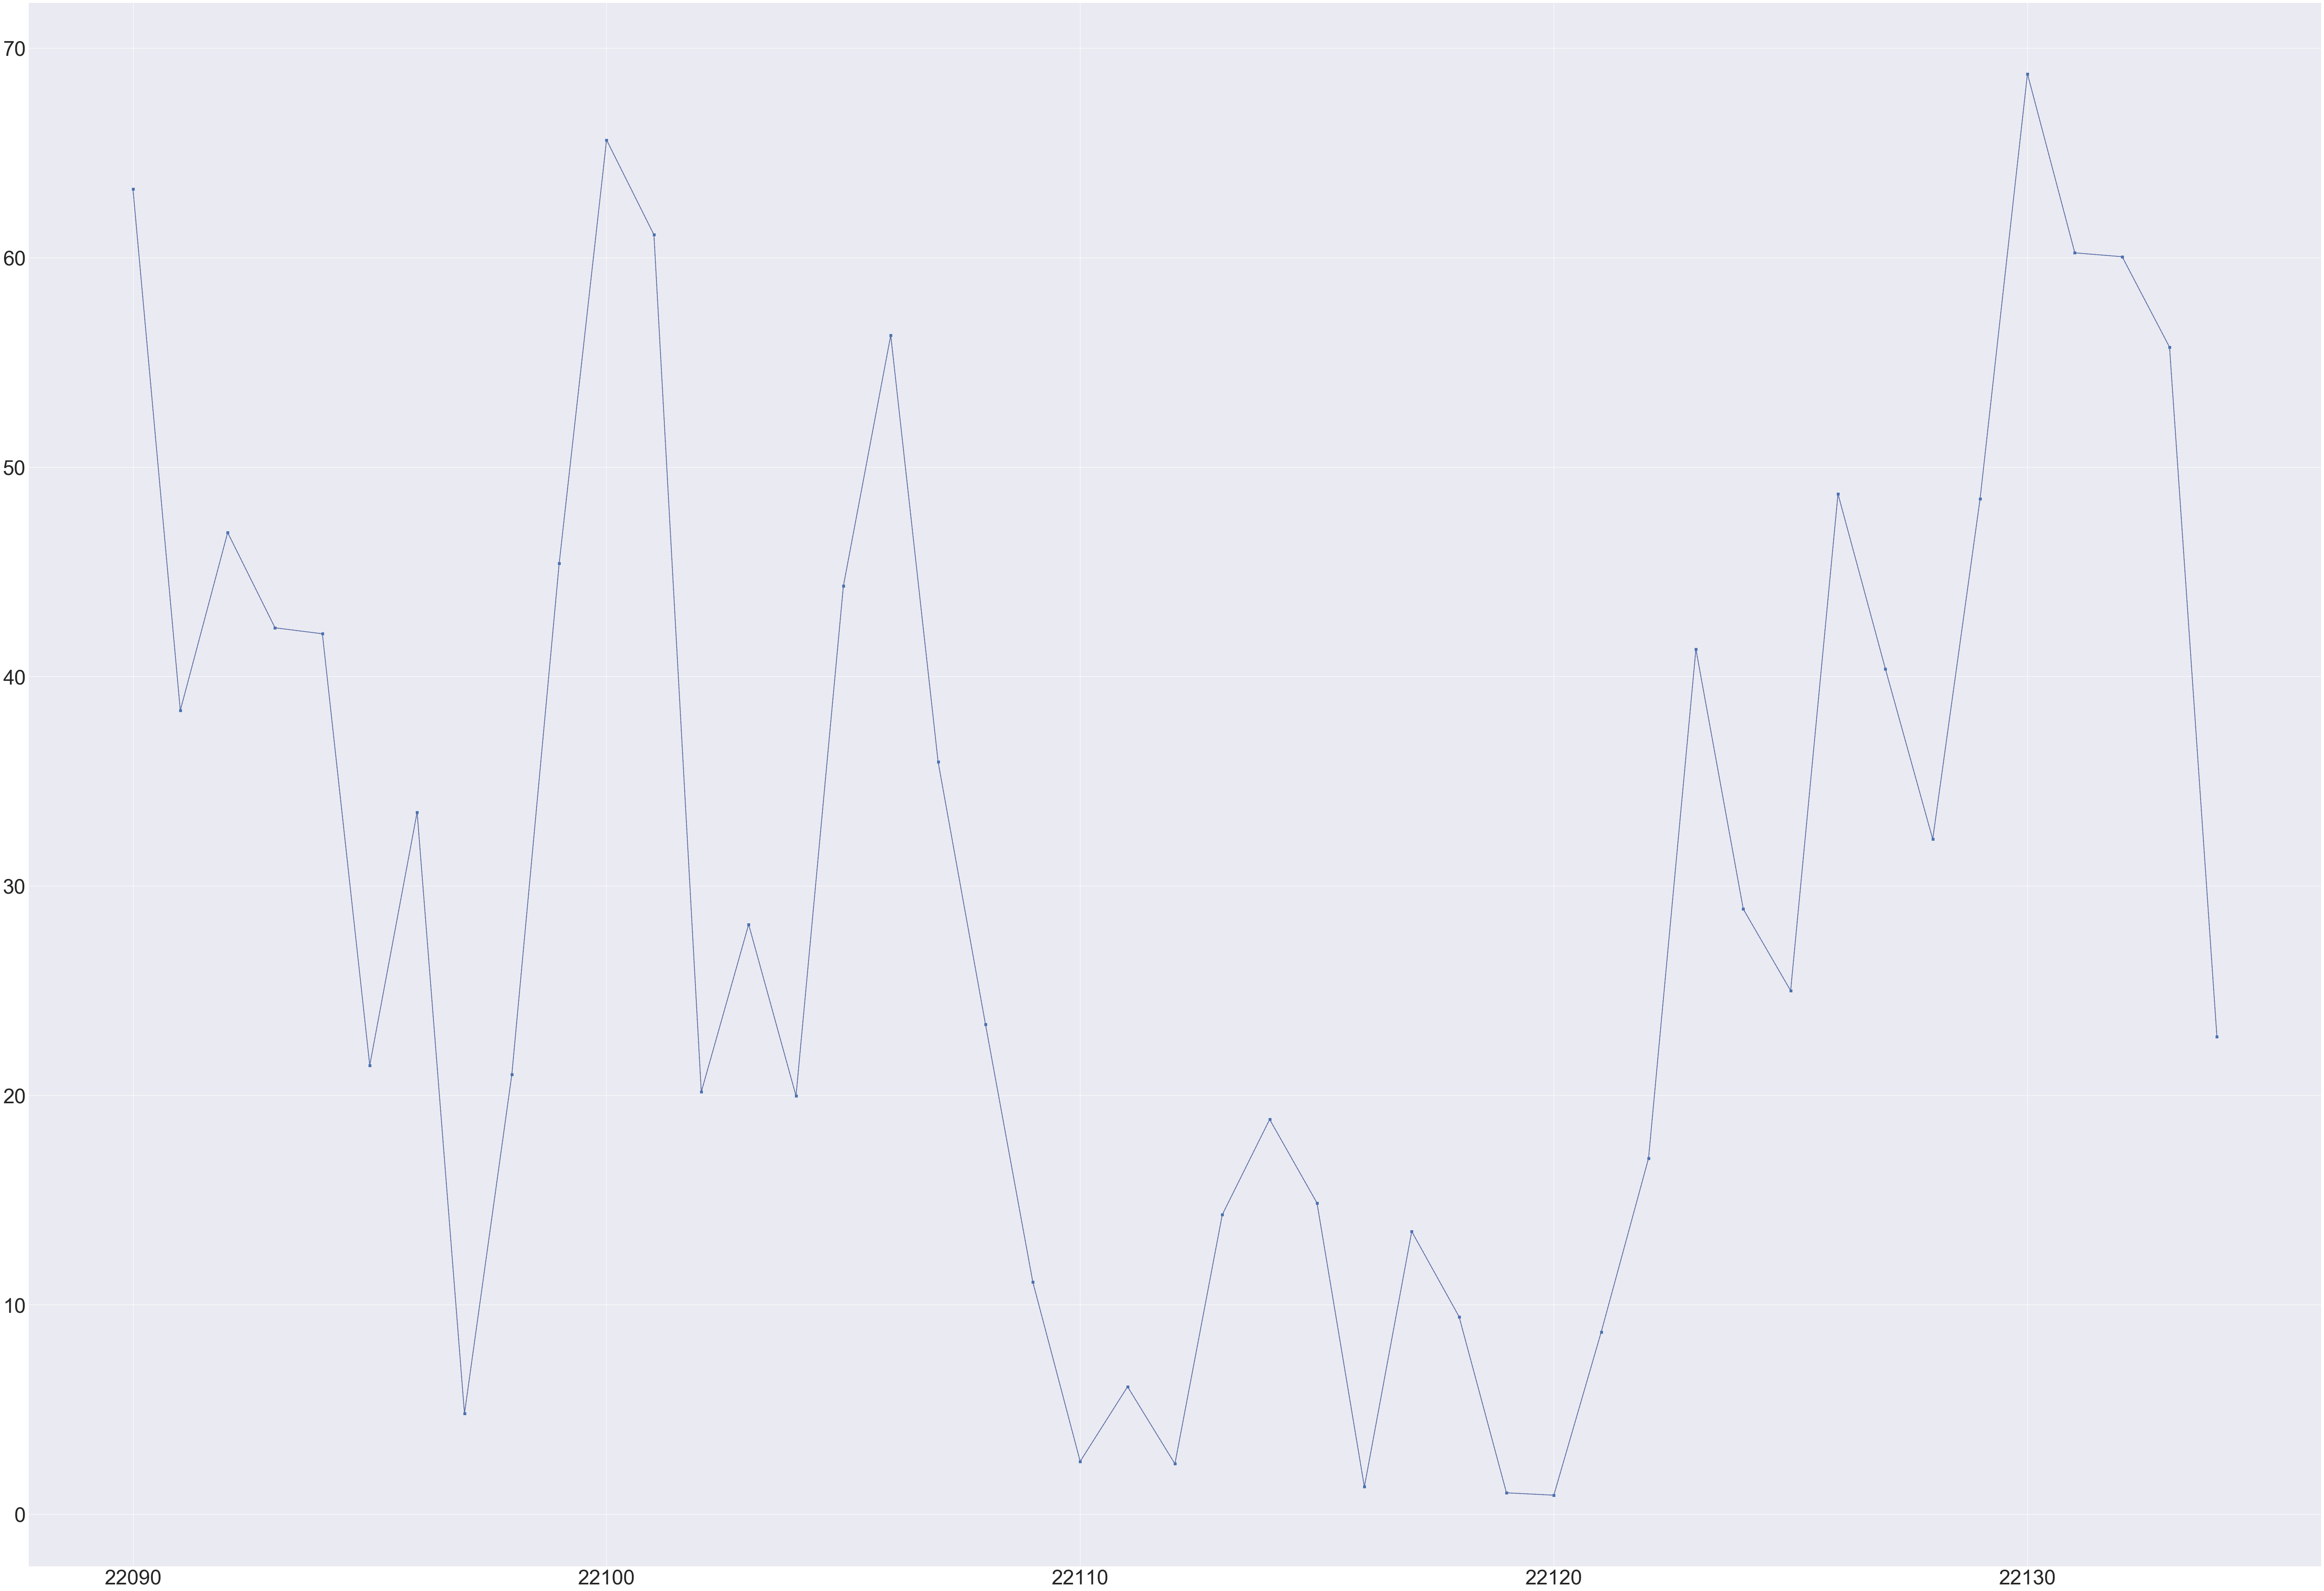

In [165]:
df2 = df[df.Test.isin(['H2b3']) & df["User ID"].isin(['399'])];
# sns.pointplot(df2["True Onset"],df2["Asynchrony"],hue=df2["User ID"]);
plt.plot(df2.index,df2["Asynchrony"].abs(),'ro--',df2.index,df2["Sanitized Asynchrony"].abs(),'bs-')
plt.show()
# plt.xticks(rotation=45)

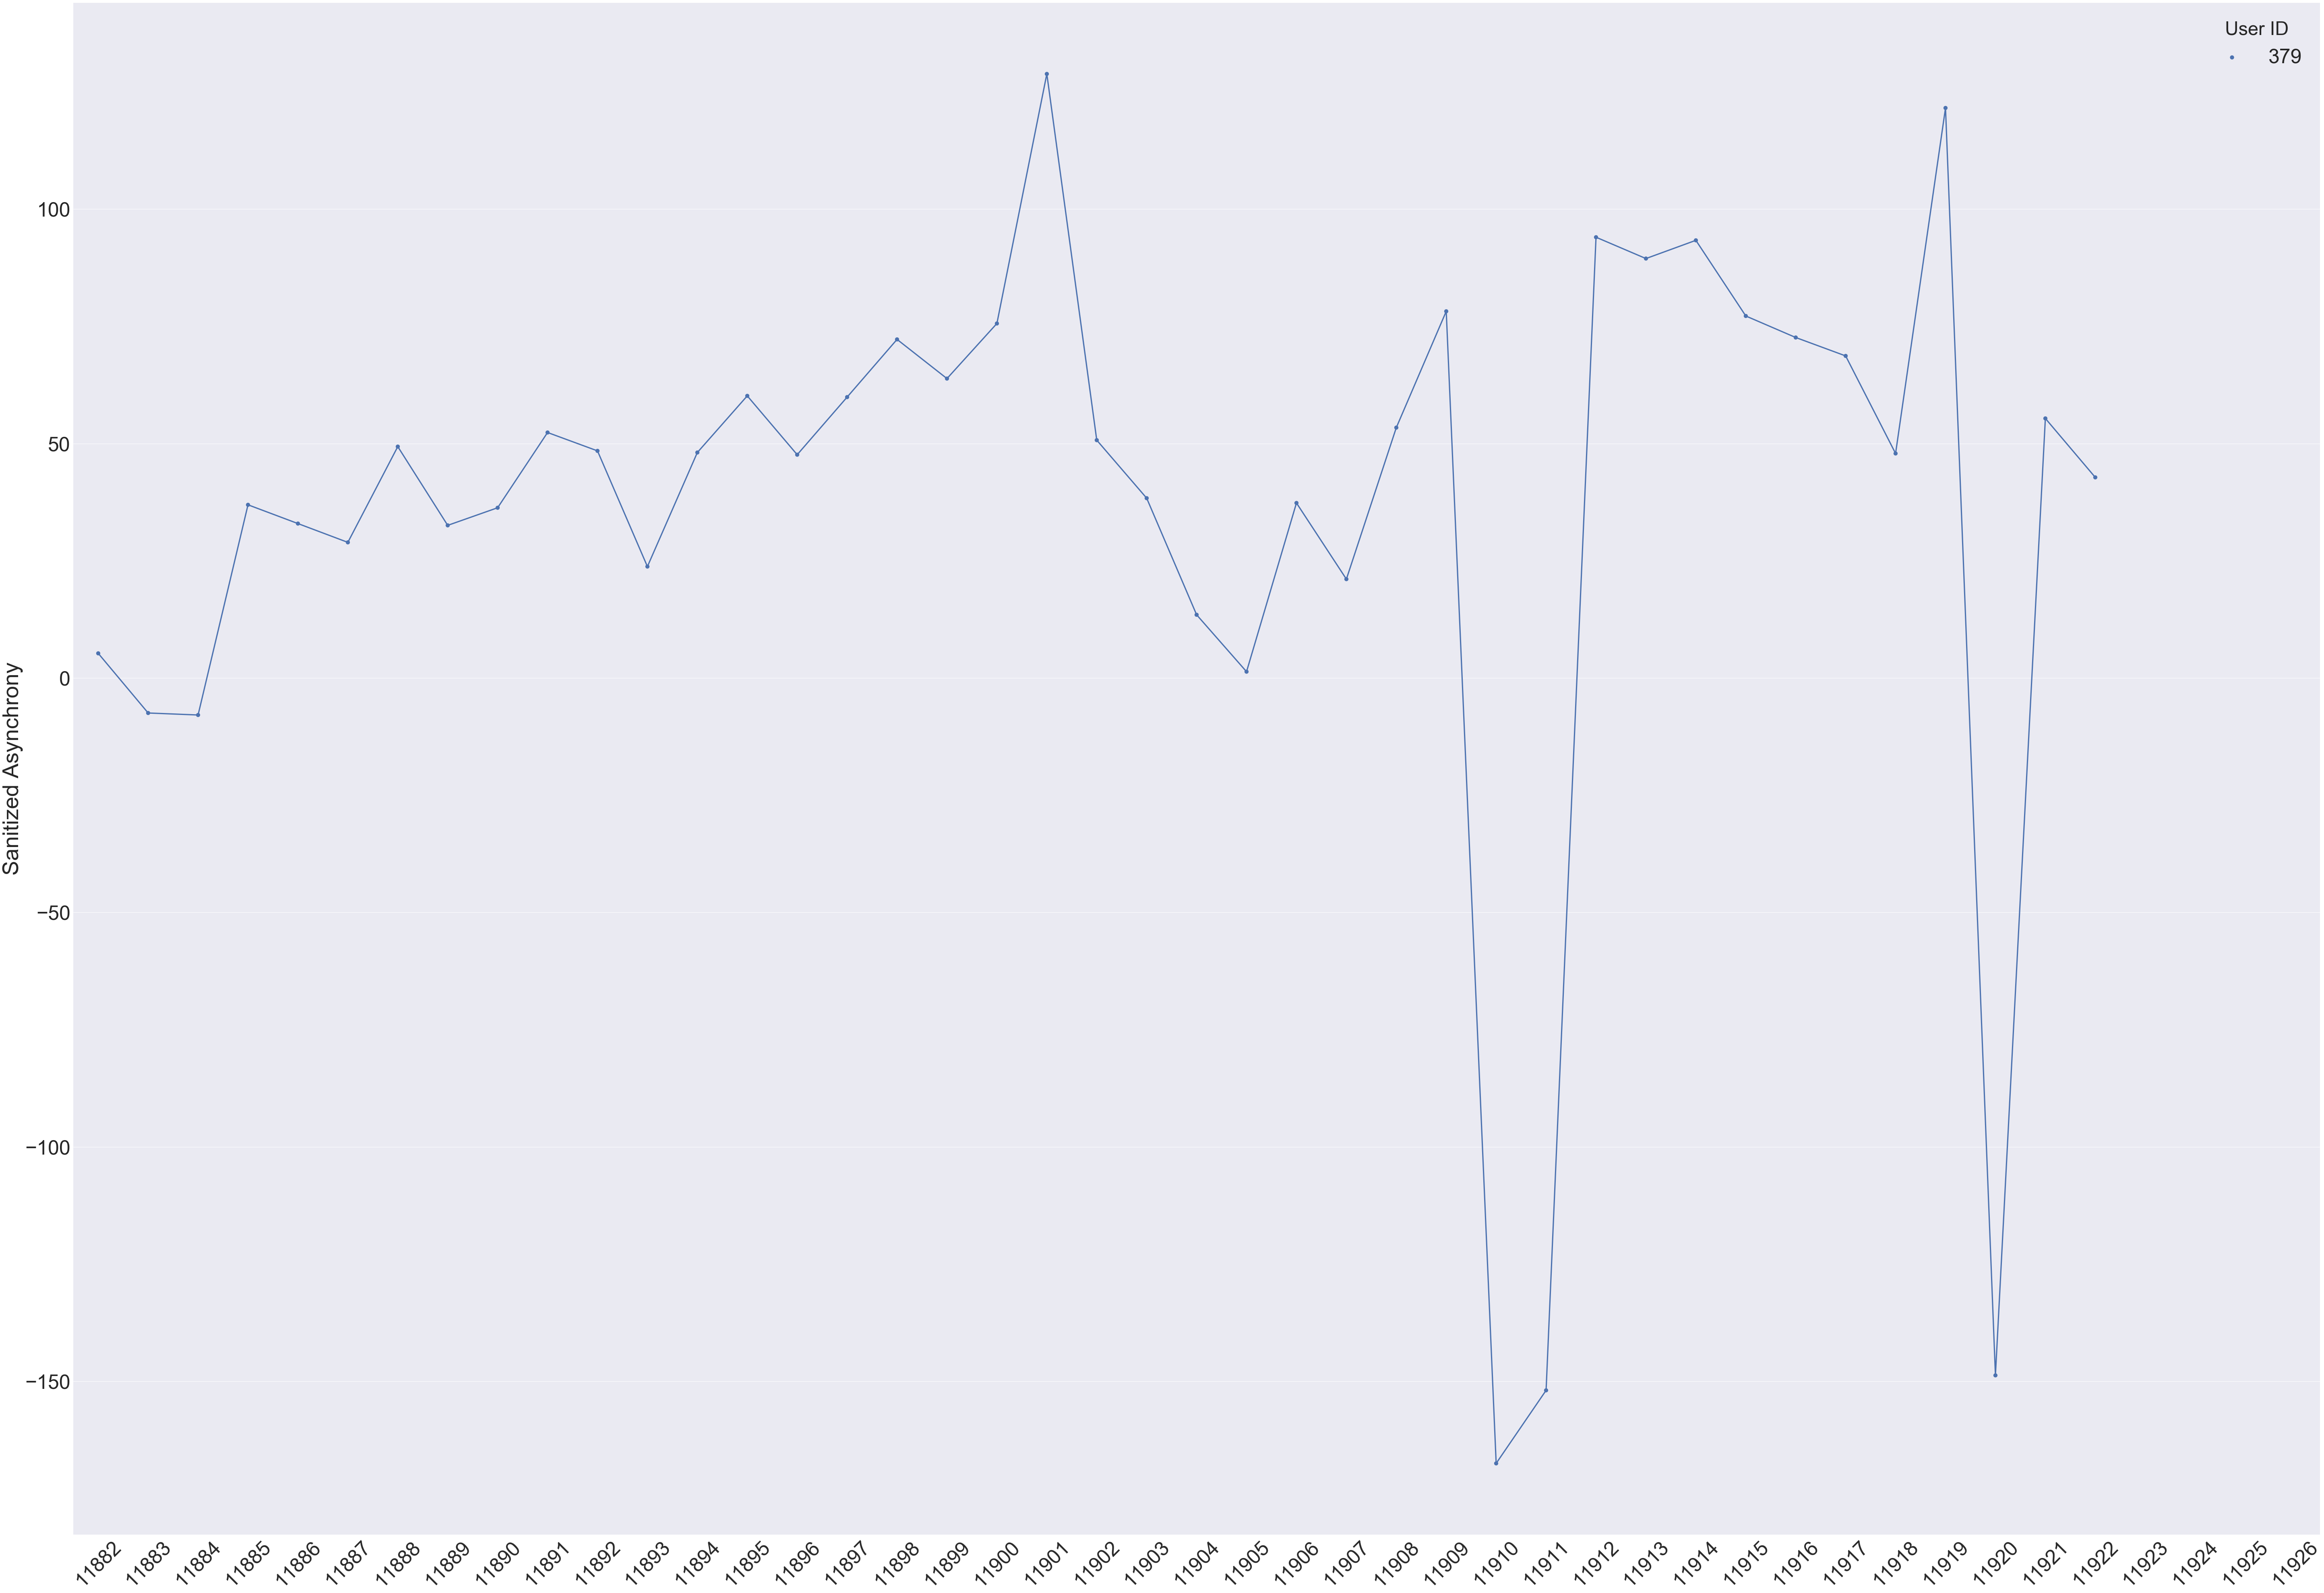

In [116]:
df2 = df[df.Test.isin(['H1a1']) & df["User ID"].isin(['379'])];
sns.pointplot(df2.index,df2["Sanitized Asynchrony"],hue=df2["User ID"]);
plt.xticks(rotation=45);

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



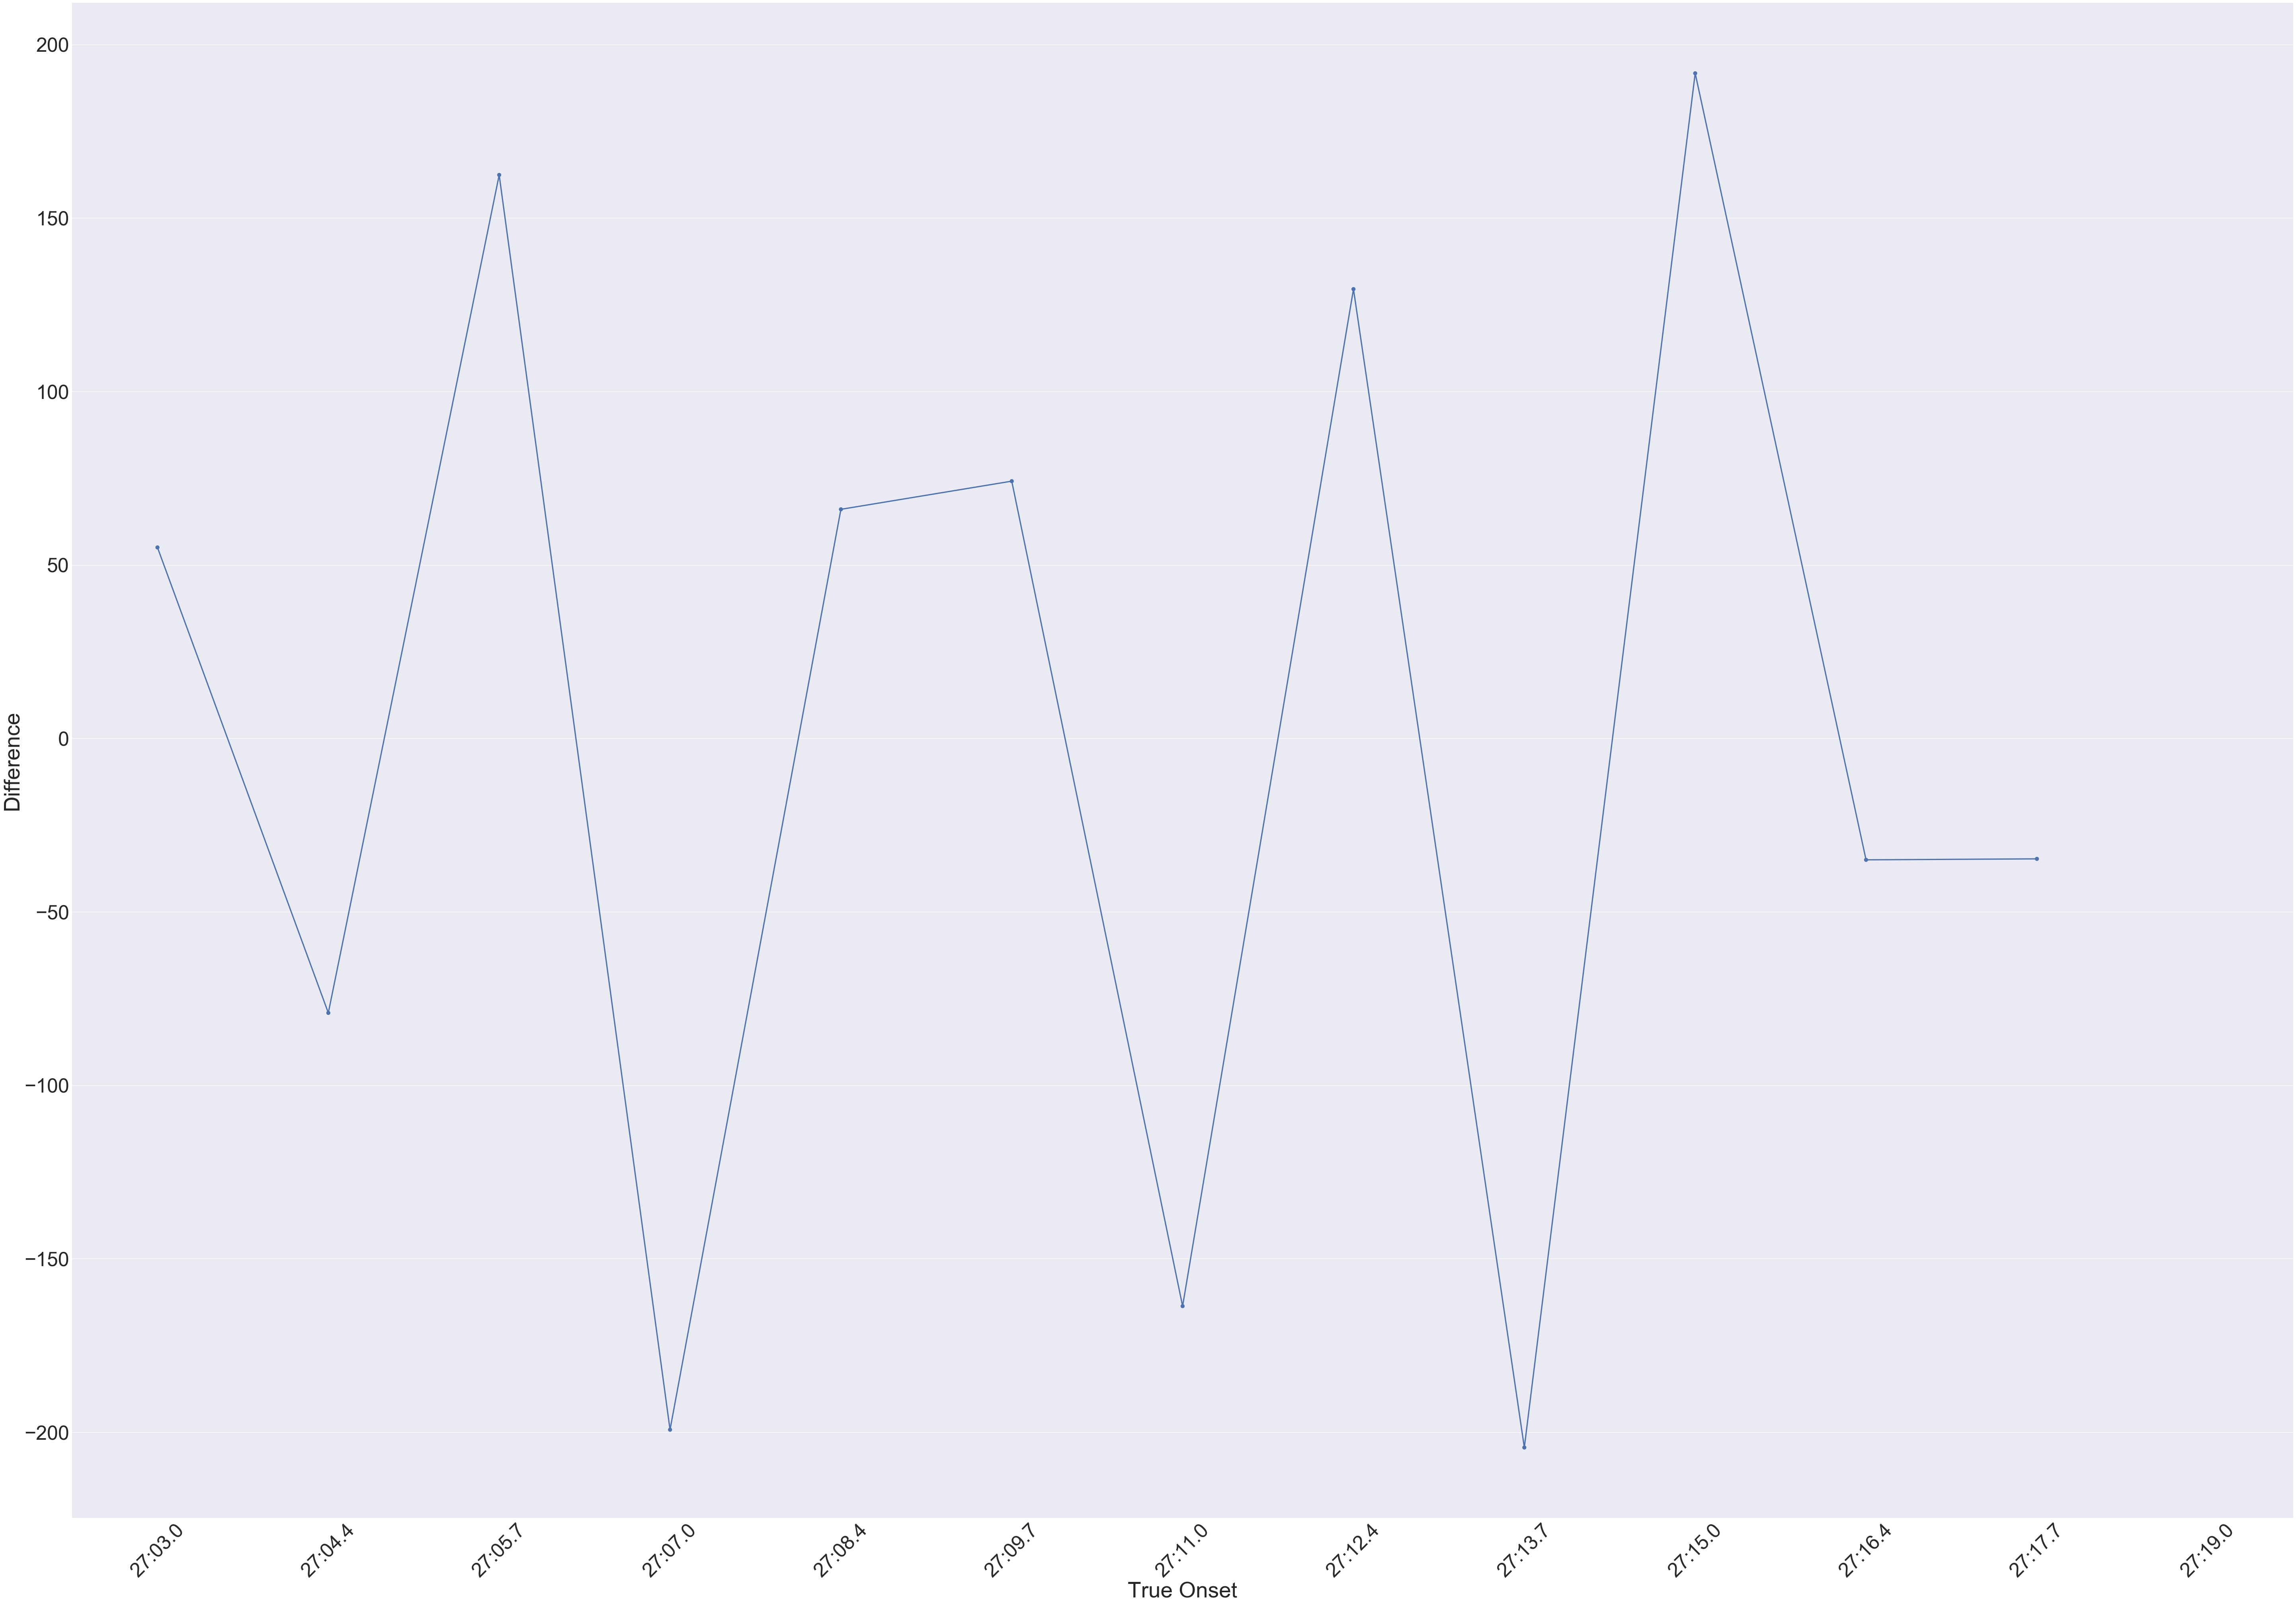

In [31]:
df2 = df[df.Test.isin(["A1a1"]) & df["User ID"].isin(["394"])];
df2["Sanitized Asynchrony"]=df2["Sanitized Asynchrony"].abs()
df2["Difference"] = df2["Sanitized Asynchrony"].shift(-1)-df2["Sanitized Asynchrony"];
sns.pointplot(df2["True Onset"],df2["Difference"]);
plt.xticks(rotation=45);

In [63]:
df2 = df[df.Test.isin(["A1a1"]) & df["User ID"].isin(["394"])];
data = [go.Scatter( x=df2['True Onset'], y=df2['Sanitized Tap Onset'])]
py.iplot(data, filename='pandas-time-series')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



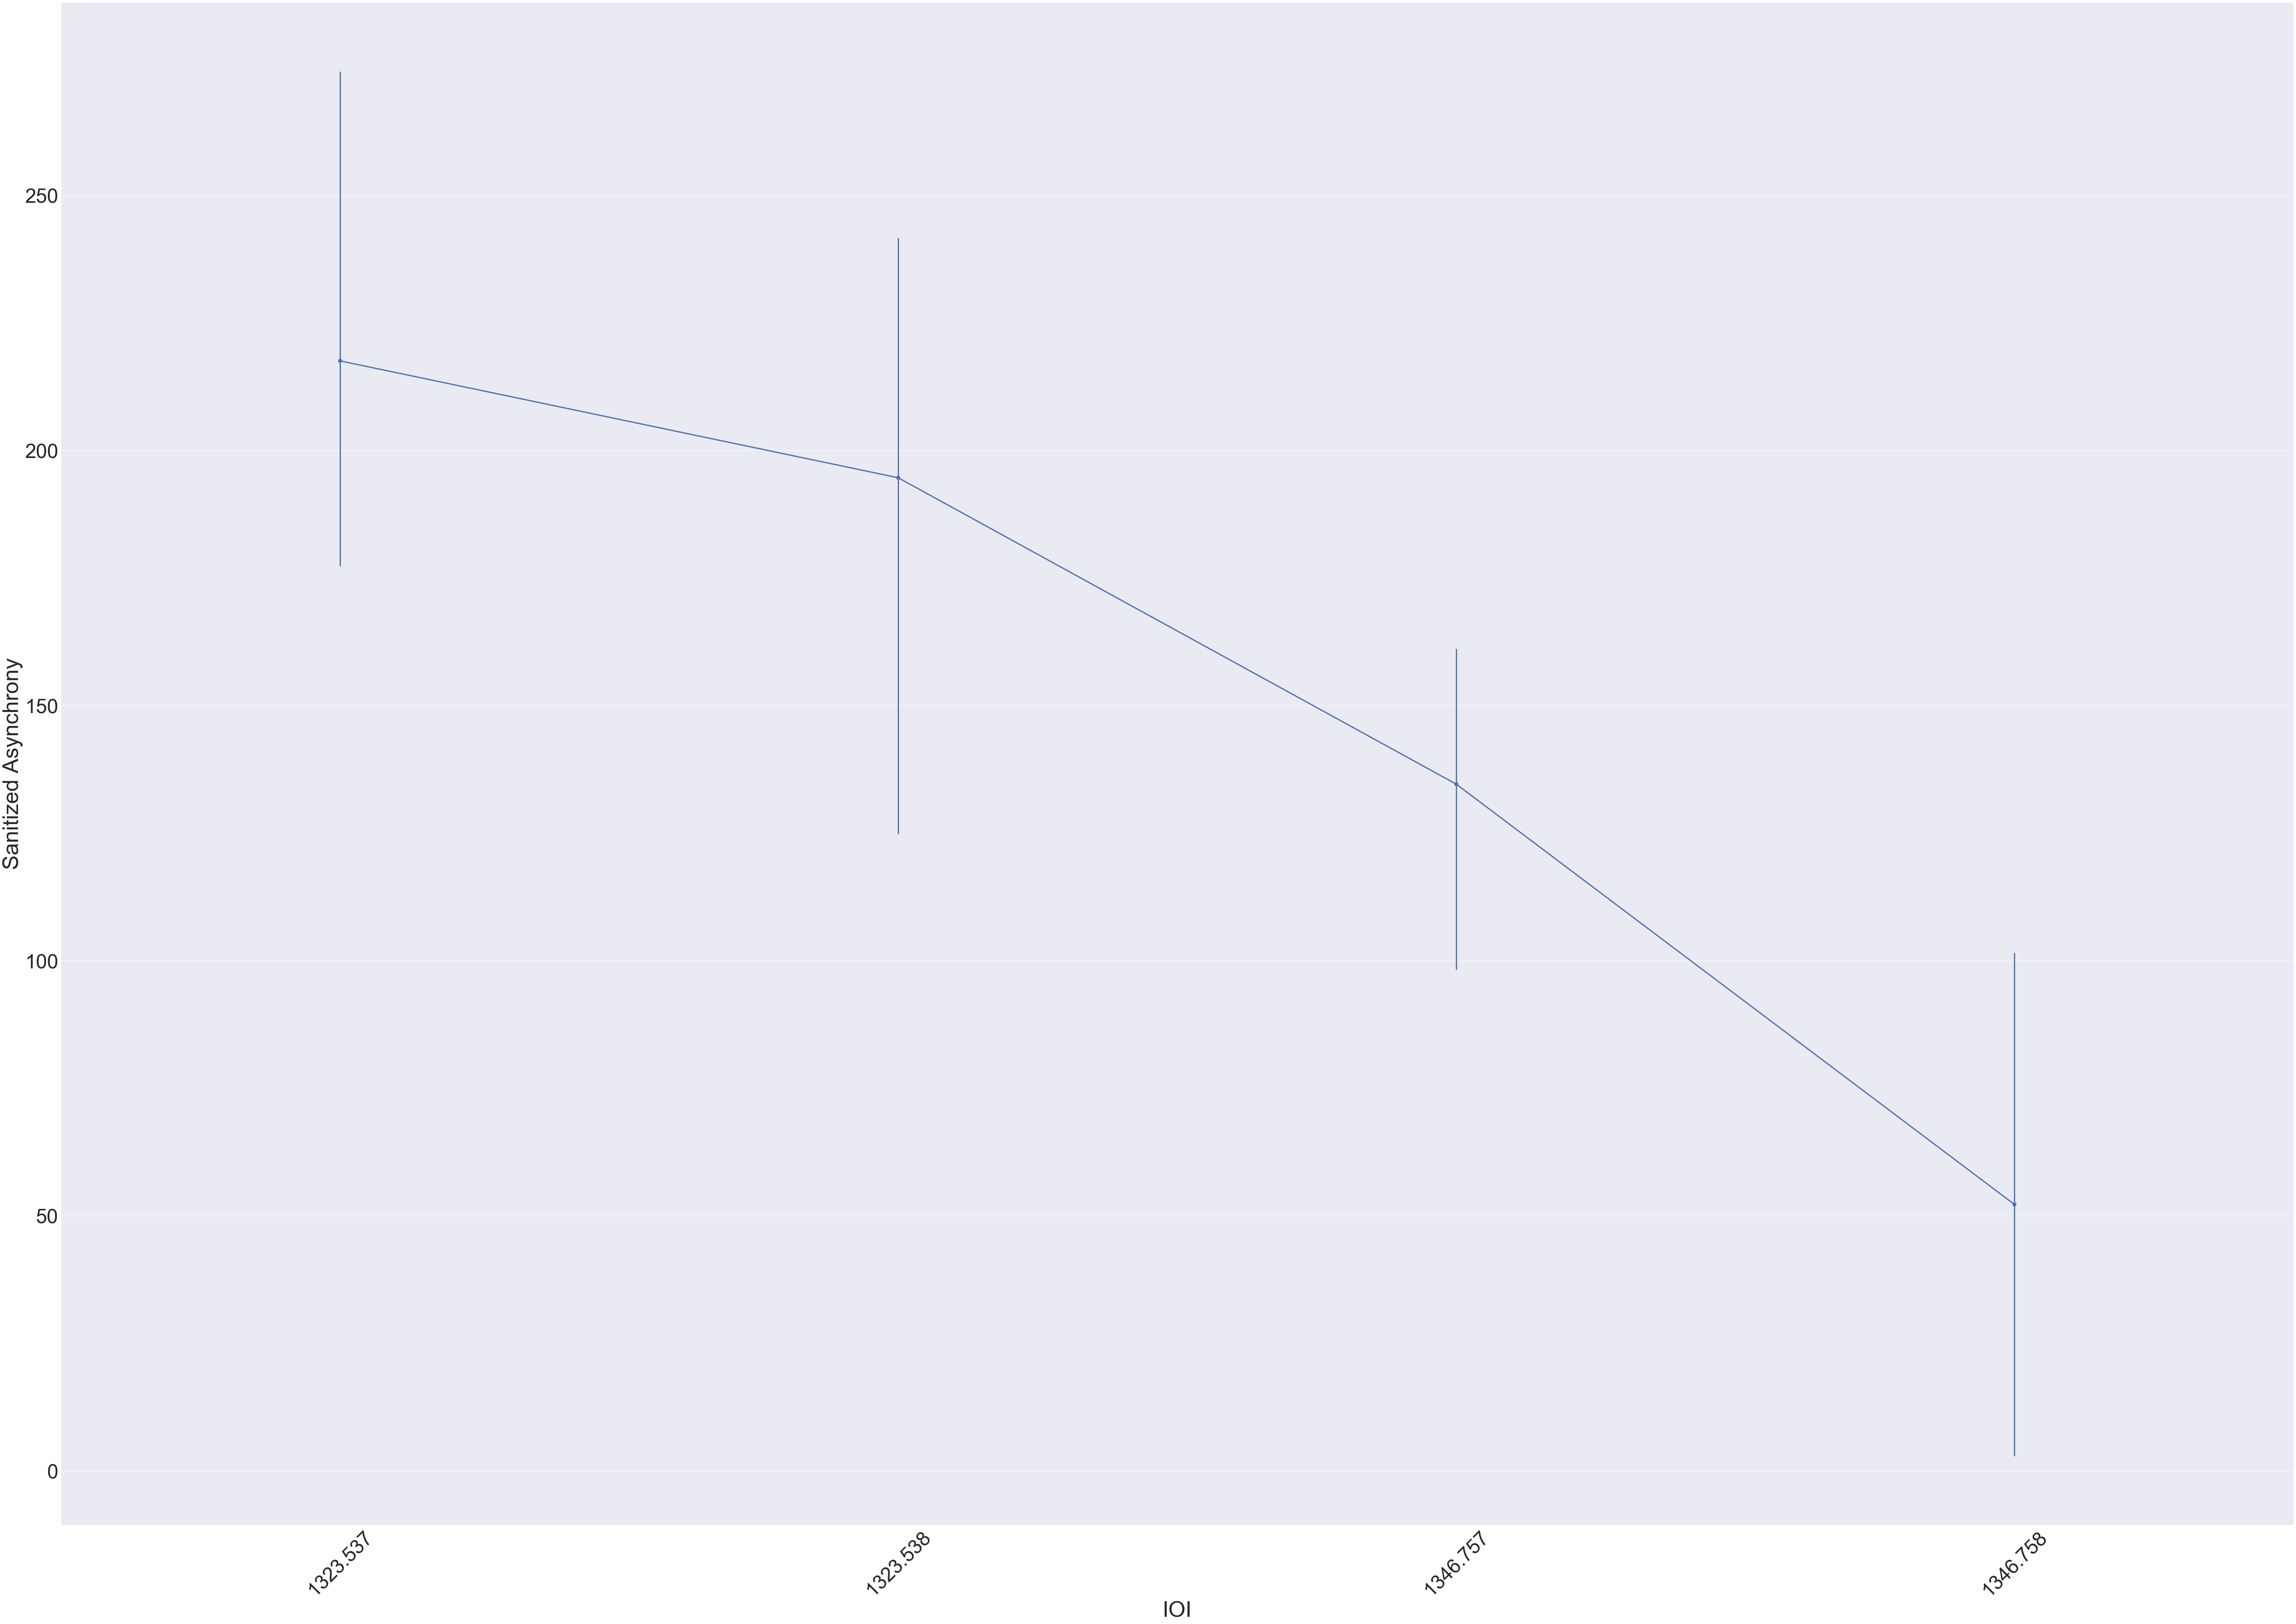

In [32]:
df2 = df[df.Test.isin(["A1a1"]) & df["User ID"].isin(["394"])];
df2["Sanitized Asynchrony"]=df2["Sanitized Asynchrony"].abs()
df2["Difference"] = df2["Sanitized Asynchrony"]-df2["Sanitized Asynchrony"].shift(-1);
sns.pointplot(df2["IOI"],df2["Sanitized Asynchrony"]);
plt.xticks(rotation=45);